# Data Visualization with Matplotlib - Bar Charts, Histograms, Box Plots, Scatter Plots

## 1. Bar Charts

### 1.1 Description of data

The data shows how many Gold, Silver and Bronze medals were won by each country in the Olympics in 2016. 

In [2]:
#import required data
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [46]:
medals = pd.read_csv('data/medals_by_country_2016.csv', )
#set the unnamed column to an index
medals.set_index('Unnamed: 0', inplace=True)
medals

,Bronze,Gold,Silver
Unnamed: 0,,,
United States,67,137,52
Germany,67,47,43
Great Britain,26,64,55
Russia,35,50,28
China,35,44,30
France,21,20,55
Australia,25,23,34
Italy,24,8,38
Canada,61,4,4


## 1.2 Creating a Bar Chart

<ipython-input-10-67f3044062a4>:3: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


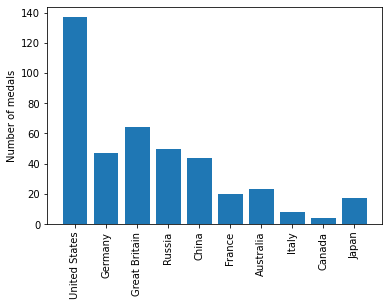

In [10]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")
plt.show()

## 1.3 Creating a stacked bar chart

<ipython-input-11-66029617eb97>:4: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


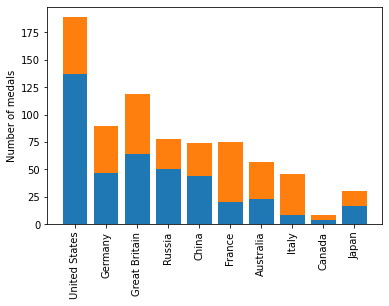

In [11]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"])
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"])
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")
plt.show()

## 1.4 Complete stacked bar chart

The `label` keyword gives the label to each of the plots. 

<ipython-input-15-74c9d7d56f2b>:5: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels(medals.index, rotation=90)


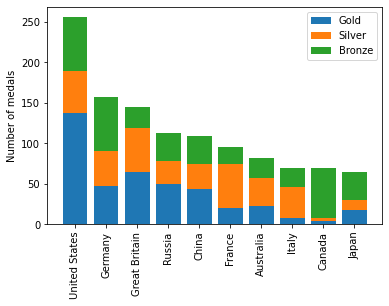

In [15]:
fig, ax = plt.subplots()
ax.bar(medals.index, medals["Gold"], label='Gold')
ax.bar(medals.index, medals["Silver"], bottom=medals["Gold"], label='Silver')
ax.bar(medals.index, medals["Bronze"], bottom=medals["Gold"]+medals['Silver'], label="Bronze")
ax.set_xticklabels(medals.index, rotation=90)
ax.set_ylabel("Number of medals")
ax.legend()
plt.show()

## 2. Histograms

### 2.1 Description of data

The data shows the information such as the height, weight age, sport and the medals won by sportmens in the Olympics 2016. Here, we focus on the players in the Rowing and the Gymnastics sport. 

In [19]:
data = pd.read_csv('data/summer2016.csv')
mens_rowing = data.loc[data['Sport'] == 'Rowing']
mens_gymnastics = data.loc[data['Sport'] == 'Gymnastics']

In [20]:
mens_rowing.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,158,62,Giovanni Abagnale,M,21.0,198.0,90.0,Italy,ITA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Coxless Pairs,Bronze
10,1228,690,Chantal Achterberg,F,31.0,172.0,72.0,Netherlands,NED,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Silver
52,6598,3691,Anne Dsane Andersen,F,23.0,183.0,86.0,Denmark,DEN,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Coxless Pairs,Bronze
78,11648,6346,Jrmie Azou,M,27.0,178.0,71.0,France,FRA,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Men's Lightweight Double Sculls,Gold
89,14103,7612,Carina Br,F,26.0,185.0,75.0,Germany,GER,2016 Summer,2016,Summer,Rio de Janeiro,Rowing,Rowing Women's Quadruple Sculls,Gold


In [21]:
mens_gymnastics.head()

,Unnamed: 0,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
4,794,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
5,796,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Horse Vault,Silver
6,797,455,Denis Mikhaylovich Ablyazin,M,24.0,161.0,62.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Rings,Bronze
122,18577,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Team All-Around,Silver
123,18579,9829,David Sagitovich Belyavsky,M,24.0,165.0,55.0,Russia,RUS,2016 Summer,2016,Summer,Rio de Janeiro,Gymnastics,Gymnastics Men's Parallel Bars,Bronze


### 2.2 Creating a histogram

A histogram shows the entire distributions of values for a variable. 

Here, we plot the height of the players for each sport versus the number of players with that height, i.e how the height is distributes among rowers and gymnasts. 

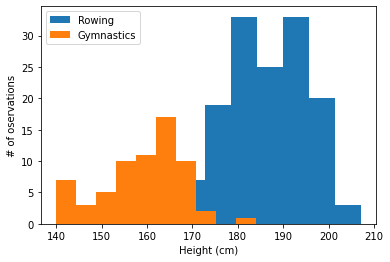

In [24]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label='Rowing')
ax.hist(mens_gymnastics["Height"], label='Gymnastics')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of observations")
ax.legend()
plt.show()

For example, there are approximately 17 sportsmen in gymnastics who have a height between 162 and 167 cm. 

### 2.3 Binning
We can also customize the number of bins using the `bins` argument to select the how the values are grouped. We also account for occluded data by using the `histtype` argument. 

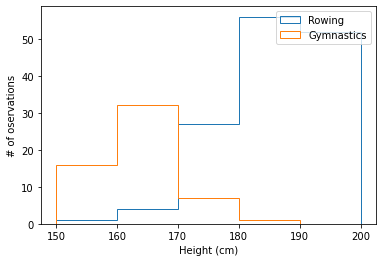

In [33]:
fig, ax = plt.subplots()
ax.hist(mens_rowing["Height"], label='Rowing', bins=[150, 160, 170, 180, 190, 200], histtype='step')
ax.hist(mens_gymnastics["Height"], histtype='step', bins=[150, 160, 170, 180, 190, 200], label='Gymnastics')
ax.set_xlabel("Height (cm)")
ax.set_ylabel("# of oservations")
ax.legend()
plt.show()

### 2.4 Data distribution
Adding error bars which summarize the data distribution using standard deviation. 

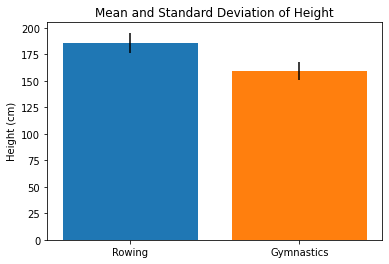

In [47]:
fig, ax = plt.subplots()
ax.bar("Rowing", mens_rowing['Height'].mean(), yerr=mens_rowing['Height'].std())
ax.bar("Gymnastics", mens_gymnastics['Height'].mean(),yerr=mens_gymnastics['Height'].std())
ax.set_ylabel("Height (cm)")
plt.title('Mean and Standard Deviation of Height')
plt.show()

## 3. Line Plots 

We can also visualize statistical information in line plots by adding error bars to line plots:

In [48]:
#reading the seattle dataset
df_seattle = pd.read_csv('data/seattle_weather.csv')
df_seattle = df_seattle[:12]
df_seattle["MONTHS"] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

#reading the austin dataset
df_austin = pd.read_csv('data/austin_weather.csv')
df_austin["MONTHS"] = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']


Plotting the standard deviation for each of the observations using the column `MLY-TAVG-STDDEV`

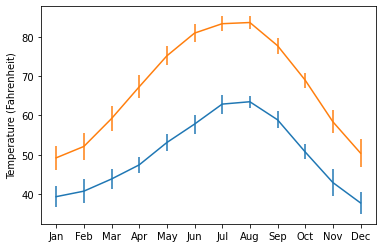

In [49]:
fig, ax = plt.subplots()
ax.errorbar(df_seattle['MONTHS'],df_seattle['MLY-TAVG-NORMAL'], yerr=df_seattle["MLY-TAVG-STDDEV"])
ax.errorbar(df_austin['MONTHS'],df_austin['MLY-TAVG-NORMAL'], yerr=df_austin["MLY-TAVG-STDDEV"])
ax.set_ylabel('Temperature (Fahrenheit)')
plt.show()

## 4. Boxplots

In the below box plot, the red line indicates the median height. The edges of the box at the centre indicate the interquartile range of the data between the 25th and 75th percentile. The whiskers at the end of the thin bars indicate one and half interquartile range beyond the 25th and 75th percentile. 

If the data is Gaussian, it is encompassed within the boxplot. 
Points that are beyond the whiskers are outliers and have values that is not expected in a Gaussian distribution.

In the below plot, there is unusually short rower and two unusual gymnasts (one short and one tall). 

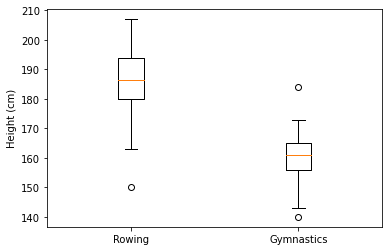

In [42]:
fig, ax = plt.subplots()
ax.boxplot([mens_rowing['Height'], mens_gymnastics['Height']])
ax.set_xticklabels(["Rowing", "Gymnastics"])
ax.set_ylabel('Height (cm)')
plt.show()

## 5. Bivariate Comparison: Scatter plots

### 5.1 Description of data
The dataset contains measurements of CO2 levels and temperatures made on the 6th of every month from 1958 until 2016.

In [52]:
climate_change = pd.read_csv('data/climate_change.csv')
climate_change.head()

,date,co2,relative_temp
0,1958-03-06,315.71,0.10
1,1958-04-06,317.45,0.01
2,1958-05-06,317.50,0.08
3,1958-06-06,NaN,-0.05
4,1958-07-06,315.86,0.06


### 5.2 Scatter plot

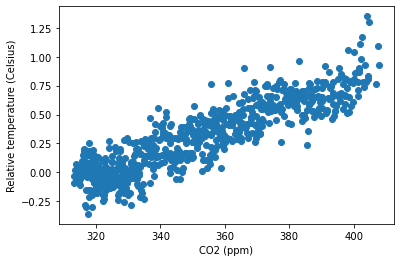

In [53]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'])
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

### 5.3 Customizing scatter plots

We separate the data into the eighties and the nineties to see the values of the CO2 level in the two decades. It is clearly seen that the CO2 level is rising over the years. 

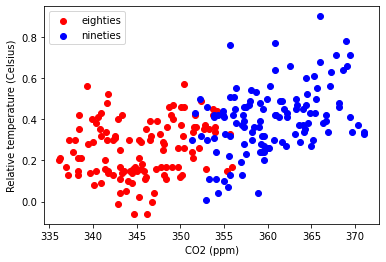

In [74]:
#separating the data
eighties = climate_change.loc[(climate_change['date'] > "1980-01-01") & (climate_change['date'] <= "1989-12-31")]
nineties = climate_change.loc[(climate_change['date'] > "1990-01-01") & (climate_change['date'] <= "1999-12-31")]

fig, ax = plt.subplots()
ax.scatter(eighties['co2'], eighties['relative_temp'], color='red', label='eighties')
ax.scatter(nineties['co2'], nineties['relative_temp'], color='blue', label='nineties')
ax.legend()
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()

### 5.4 Customizing a third variable by colour:

The index of the `climate_change` dataframe contains the time information. This can be visualized as follows:

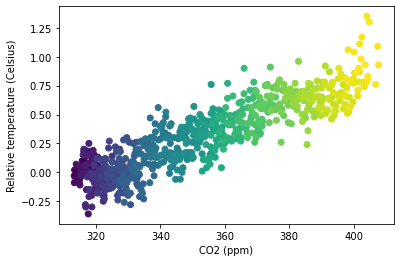

In [76]:
fig, ax = plt.subplots()
ax.scatter(climate_change['co2'], climate_change['relative_temp'], c=climate_change.index)
ax.set_xlabel('CO2 (ppm)')
ax.set_ylabel("Relative temperature (Celsius)")
plt.show()